# Práctica 3

# Dataset 1

# Limpieza de datos

Se propone hacer el EDA del dataset 120 years of Olympic history: athletes and results. basic bio.
Una recopilación básica de datos biográficos de atletas medalleros desde Athenas en 1896 hasta Rio en 2016. Consultado en: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

## Data Exploration

Importamos los módulos necesarios.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

In [2]:
OG = pd.read_csv('athlete_events.csv')
OG.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# shape and data types of the data
print('El número de registros en el dataset es: '+ str(OG.shape[0]) + ' y el número de atributos es: ' + str(OG.shape[1])+'.')

El número de registros en el dataset es: 271116 y el número de atributos es: 15.


In [4]:
pd.DataFrame(OG.dtypes, columns=['Type'])

,Type
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


Selección de columnas con variables numéricas

In [5]:
OG_numericas = OG.select_dtypes(include=[np.number])
cols_numericas = OG_numericas.columns.values
print(cols_numericas)

['ID' 'Age' 'Height' 'Weight' 'Year']


Selección de columnas con variables categóricas

In [6]:
OG_no_numericas = OG.select_dtypes(exclude=[np.number])
cols_no_numericas = OG_no_numericas.columns.values
print(cols_no_numericas)

['Name' 'Sex' 'Team' 'NOC' 'Games' 'Season' 'City' 'Sport' 'Event' 'Medal']


## Datos faltantes

Técnica #1: mapa de calor de los datos faltantes

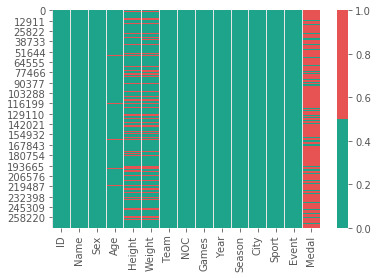

In [7]:
columnas = OG.columns
colores = ['#1EA48A', '#E65352'] #Red is missing. Blue is not missing.
sns.heatmap(OG[columnas].isnull(), cmap=sns.color_palette(colores))

Observación: Los atributos Height (altura) y Weight (Peso) tienen valores que, a juicio de la visualización, son nulos siempre que alguno de los dos no esté. Tampoco tenemos algunas edades de los atletas. Además, cabe mencionar que en el atributo Medal (medallas) tenemos muchos valores faltantes, sin embargo, estos se refieren a que el atleta mencionado no ganó medallas.

Técnica #2: Lista de porcentaje de datos faltantes

In [8]:
columnas_missing=[]
porcentaje_missing=[]
for col in columnas:
    porcentaje_missing_values = np.mean(OG[col].isnull())
    if (porcentaje_missing_values > 0):
        columnas_missing.append(col)
        porcentaje_missing.append(str(round(porcentaje_missing_values*100))+'%')
        
OG_faltantes = pd.DataFrame(data=np.c_[columnas_missing, porcentaje_missing], columns=['Atributo', 'Porcentaje valores faltantes'])
OG_faltantes

,Atributo,Porcentaje valores faltantes
0,Age,3.0%
1,Height,22.0%
2,Weight,23.0%
3,Medal,85.0%


Técnica #3: Histograma de datos faltantes

Indicador faltante creado para: Age
Indicador faltante creado para: Height
Indicador faltante creado para: Weight
Indicador faltante creado para: Medal


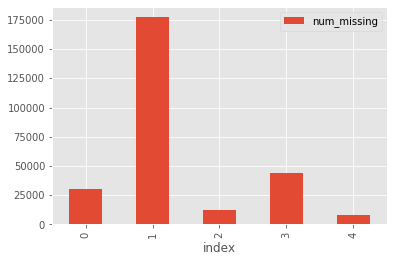

In [9]:
# first create missing indicator for features with missing data
for col in OG.columns:
    #Crea un arreglo con T/F donde T es que hay un nulo, después lo suma.
    missing = OG[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('Indicador faltante creado para: {}'.format(col))
        OG['{}_tiene_faltantes'.format(col)] = missing
        
# Basado en el indicador anterior, se crea la gráfica 
ismissing_cols = [col for col in OG.columns if 'tiene_faltantes' in col]
OG['num_missing'] = OG[ismissing_cols].sum(axis=1)

OG['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
plt.show()

## Técnicas para tratar con los valores atípicos

Técnica #1: Histograma y Box Plot

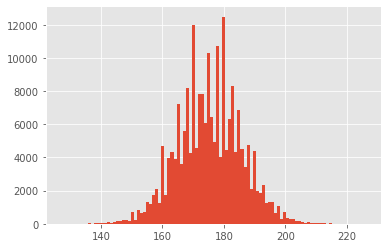

In [10]:
OG['Height'].hist(bins=100)
plt.show()

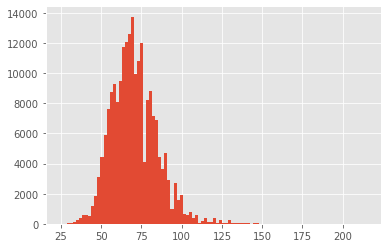

In [11]:
OG['Weight'].hist(bins=100)
plt.show()

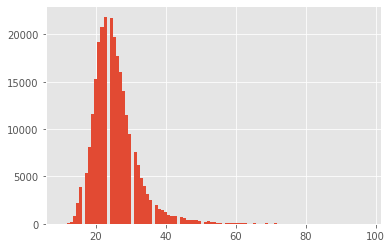

In [12]:
OG['Age'].hist(bins=100)
plt.show()

Por medio del histograma anterior, se podría asumir que los datos se distribuyen de manera normal. Se tendría que aplicar test para saber si se distribuye así.

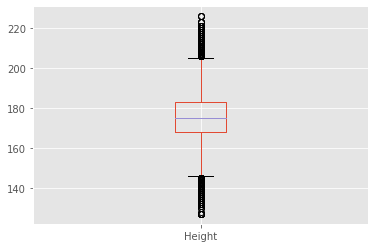

In [13]:
OG.boxplot(column=['Height'])
plt.show()

En el boxlplot anterior, podemos observar que los valores atípicos no se dispersan tanto de la media.

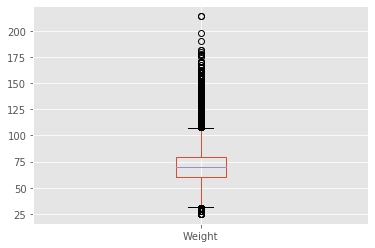

In [14]:
OG.boxplot(column=['Weight'])
plt.show()

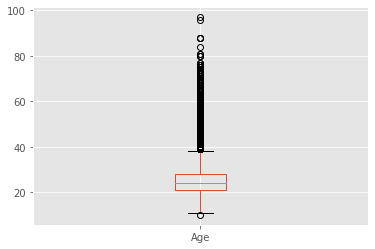

In [15]:
OG.boxplot(column=['Age'])
plt.show()

Técnica #2: Estadística descriptiva

In [16]:
OG['Height'].describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

El dato que se posiciona en el cuartil 75% es de 183, mientras que el máximo es de 226. 

Técnica #3: Gráfico de barras

Este es el ejemplo de una variable categórica.

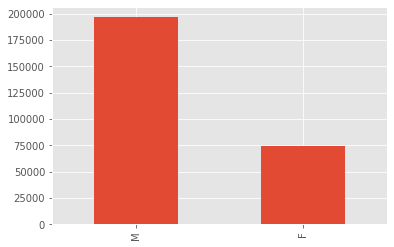

In [17]:
OG['Sex'].value_counts().plot.bar()

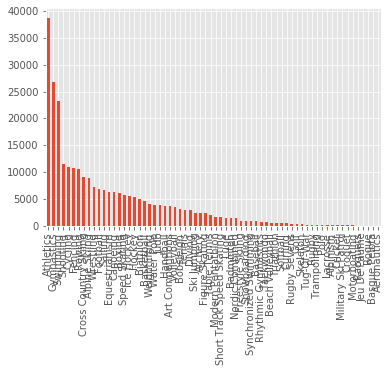

In [18]:
OG['Sport'].value_counts().plot.bar()

## ¿Qué hacer con los valores atípicos?


Aunque los valores atípicos no son difíciles de detectar, tenemos que determinar las soluciones adecuadas para manejarlos. Depende en gran medida del conjunto de datos y del objetivo del proyecto. Los métodos para manejar los valores atípicos son algo similar a los datos que faltan. O bien los eliminamos, los ajustamos o los conservamos.

## Datos innecesarios

Todos los datos que se introduzcan en el modelo deberían servir para el propósito del proyecto. Los datos innecesarios son cuando los datos no añaden valor. Cubrimos tres tipos principales de datos innecesarios debido a diferentes razones.

Tipo innecesario #1: Desinformativo / Repetitivo

A veces una característica no es informativa porque tiene demasiadas observaciones que tienen el mismo valor

In [19]:
num_filas = len(OG.index)
low_information_cols = [] #

for col in OG.columns:
    cnts = OG[col].value_counts(dropna=False)
    top_pct = (cnts/num_filas).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Age_tiene_faltantes: 96.50555%
False    261642
True       9474
Name: Age_tiene_faltantes, dtype: int64



¿Qué hacer?
Necesitamos entender las razones detrás de la característica repetitiva. Cuando son genuinamente desinformativas, podemos descartarlas.

Tipo innecesario #2: Irrelevante
Una vez más, los datos deben proporcionar información valiosa para el proyecto. Si las características no están relacionadas con la cuestión que estamos tratando de resolver en el proyecto, son irrelevantes.

¿Cómo averiguarlo?
Necesitamos hojear las características para identificar las irrelevantes. Por ejemplo, un rasgo que registra la temperatura en Toronto no proporciona ninguna información útil para predecir los precios de las viviendas en Rusia.

¿Qué hacer?
Cuando las características no sirven al objetivo del proyecto, podemos eliminarlas.

feature selection

## Tipo innecesario #3: Duplicados

Los datos duplicados son cuando existen copias de la misma observación. Hay dos tipos principales de datos duplicados.

## Duplicados tipo #1: todas las características

¿Cómo averiguarlo? 

Este duplicado ocurre cuando todos los valores de las características dentro de las observaciones son los mismos. Es fácil de encontrar. Primero quitamos el identificador único del conjunto de datos. Luego creamos un conjunto de datos llamado OG_dedupped eliminando los duplicados. Comparamos las formas de los dos conjuntos de datos (OG y OG_dedupped) para averiguar el número de filas duplicadas.

In [20]:
OG_dedupped = OG.drop('ID', axis=1).drop_duplicates()

# there were duplicate rows
print(OG.shape)
print(OG_dedupped.shape)

(271116, 20)
(269731, 19)


## Duplicados tipo #2: características claves

¿Cómo averiguarlo?
A veces es mejor eliminar los datos duplicados basándose en un conjunto de identificadores únicos. Podemos establecer un grupo de características críticas como identificadores únicos para las transacciones. Incluimos ID, Name, Age, Team, Year y Sport. Comprobamos si hay duplicados basados en ellos.

In [21]:
key = ['ID', 'Name', 'Age', 'Team', 'Year', 'Sport', 'Event', 'num_missing']
OG.fillna(-999).groupby(key)['ID'].count().sort_values(ascending=False).head(20)

ID      Name                                    Age     Team           Year  Sport             Event                                                           num_missing
77710   Robert Tait McKenzie                     65.0   Canada         1932  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event               3              43
83312   Alfred James Munnings                    69.0   Great Britain  1948  Art Competitions  Art Competitions Mixed Painting, Unknown Event                  3              25
12380   Acee Blue Eagle                          24.0   United States  1932  Art Competitions  Art Competitions Mixed Painting, Unknown Event                  3              17
86677   Stanisaw Noakowski                       61.0   Poland         1928  Art Competitions  Art Competitions Mixed Painting, Drawings And Water Colors      3              17
74532   Miltiades Manno                          53.0   Hungary        1932  Art Competitions  Art Competitions Mixed Pai

¿Qué hacer?
Podemos eliminar estos duplicados basándonos en las características principales.

In [22]:
# drop duplicates based on an subset of variables.

key = ['ID', 'Name', 'Age', 'Team', 'Year', 'Sport', 'Event', 'num_missing']
OG_dedupped2 = OG.drop_duplicates(subset=key)

print(OG.shape)
print(OG_dedupped2.shape)

(271116, 20)
(269717, 20)


## Datos inconsistentes

También es crucial que el conjunto de datos siga estándares específicos para ajustarse a un modelo. Necesitamos explorar los datos de diferentes maneras para encontrar los datos inconsistentes. La mayor parte del tiempo, depende de las observaciones y la experiencia. No hay un código establecido para ejecutarlo y arreglarlo todo. A continuación cubrimos cuatro tipos de datos inconsistentes.

Tipo inconsistente #1: Capitalización
El uso inconsistente de las mayúsculas y minúsculas en los valores categóricos es un error común. Podría causar problemas ya que los análisis en Python son sensibles a las mayúsculas y minúsculas.

¿Cómo averiguarlo?

Veamos la característica Sport

In [23]:
OG['Sport'].value_counts(dropna=False)

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Cross Country Skiing      9133
Alpine Skiing             8829
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Speed Skating             5613
Ice Hockey                5516
Hockey                    5417
Biathlon                  4893
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Bobsleigh                 3058
Tennis                    2862
Diving                    2842
Ski Jumping               2401
                         ...  
Badminton                 1457
Nordic C

¿Qué hacer?
Para evitarlo, podemos poner todas las letras en minúsculas (o mayúsculas).

In [24]:
# make everything lower case.
OG['sub_Team_lower'] = OG['Team'].str.lower()
OG['sub_Team_lower'].value_counts(dropna=False)

united states         17847
france                11988
great britain         11404
italy                 10260
germany                9326
canada                 9279
japan                  8289
sweden                 8052
australia              7513
hungary                6547
poland                 6143
switzerland            5844
netherlands            5718
soviet union           5535
finland                5379
spain                  5224
china                  4975
russia                 4922
austria                4866
norway                 4708
czechoslovakia         4352
south korea            4344
romania                4303
brazil                 3772
belgium                3687
bulgaria               3518
denmark                3424
argentina              3199
west germany           3199
greece                 2976
                      ...  
greenoaks dundee          1
solos carex               1
oxalis                    1
souvenance                1
dresden             

## Tipo inconsistente #2: Formatos

Otra estandarización que debemos realizar es la de los formatos de datos. Un ejemplo es convertir la característica timestamp al formato DateTime.

(Mi dataset no tenía atributos con timestamp) :(

## Tipo inconsistente #3: Valores categóricos

Una característica categórica tiene un número limitado de valores (símbolos). A veces puede haber otros valores debido a razones como los errores tipográficos.

¿Cómo averiguarlo?

Necesitamos observar la característica para descubrir esta inconsistencia. Mostrémoslo con un ejemplo. Creamos un nuevo conjunto de datos a continuación.  Pero ambos se refieren al valor correcto "toronto". Una forma sencilla de identificarlos es la distancia edit. Mide cuántas letras (distancia) necesitamos para cambiar la ortografía de un valor para que coincida con otro valor.

In [28]:
from nltk.metrics import edit_distance

OG_Sport_ex = pd.DataFrame(data={'Sport': ['Basketball', 'basketball', 'basketbal ', 'basketball ', 'Judo', 'judo', 'Yudo', 'judo ']})

OG_Sport_ex['Sport_distance_Basketball'] = OG_Sport_ex['Sport'].map(lambda x: edit_distance(x, 'Basketball'))
OG_Sport_ex['Sport_distance_Judo'] = OG_Sport_ex['Sport'].map(lambda x: edit_distance(x, 'Judo'))
OG_Sport_ex

,Sport,Sport_distance_Basketball,Sport_distance_Judo
0,Basketball,0,10
1,basketball,1,10
2,basketbal,2,10
3,basketball,2,11
4,Judo,10,0
5,judo,10,1
6,Yudo,10,1
7,judo,10,2


¿Qué hacer?
Podemos establecer criterios para convertir estos errores tipográficos a los valores correctos. Por ejemplo, el siguiente código establece que todos los valores dentro de una distancia de 2 letras de "Basketball" sean "Basketball" y "Judo" sean "Judo".

In [30]:
msk = OG_Sport_ex['Sport_distance_Basketball'] <= 2
OG_Sport_ex.loc[msk, 'Sport'] = 'Basketball'

msk = OG_Sport_ex['Sport_distance_Judo'] <= 2
OG_Sport_ex.loc[msk, 'Sport'] = 'Judo'

OG_Sport_ex

,Sport,Sport_distance_Basketball,Sport_distance_Judo
0,Basketball,0,10
1,Basketball,1,10
2,Basketball,2,10
3,Basketball,2,11
4,Judo,10,0
5,Judo,10,1
6,Judo,10,1
7,Judo,10,2


## Tipo inconsistente #4: Direcciones
La característica de la dirección podría ser un dolor de cabeza para muchos de nosotros. Porque la gente que introduce los datos en la base de datos a menudo no sigue un formato estándar.

(Mi dataset no tenía atributos con formato de direcciones :D)